In [5]:
import requests

token = 'b2e5577fb2e5577fb2e5577f2cb1f3b1eebb2e5b2e5577fd7412cd2f14e4546c85b1c90'
version = 5.199
domain = 'unusual_ads'
count = 100
offset = 0
total_posts = 5000

all_posts = []

In [6]:
while offset < 7000:
    response = requests.get('https://api.vk.com/method/wall.get',
                            params={
                                'access_token': token,
                                'v': version,
                                'domain': domain,
                                'count': count,
                                'offset': offset
                            }
                            )
    data = response.json()['response']['items']
    for post in data:
        post_data = {
            'comments_count': post['comments']['count'],
            'views_count': post['views']['count'],
            'reactions_count': post['likes']['count'] + post['reposts']['count'],
            'date_published': post['date'],
            'date_edited': post.get('edited', None),
            'ads': post['marked_as_ads'],
            'text': post['text']
        }
        all_posts.append(post_data)
        
    offset += 100


In [7]:
print("Спарсено", len(all_posts), "постов.")

Спарсено 7000 постов.


In [53]:
import pandas as pd

df = pd.DataFrame(all_posts)

df.to_csv('posts_data.csv', index=False)

In [71]:
import pandas as pd
data = pd.read_csv('posts_data.csv')

data.head(10)

,comments_count,views_count,reactions_count,date_published,date_edited,ads,text
0,9,12576,230,1707764340,NaN,0,Mercedes-Benz E-класс (2007 г.в) \n🚗Заявленный...
1,0,8179,1,1707759900,NaN,1,Премиальный подарок мужчине! \nШахматы и нарды...
2,0,8749,58,1707749940,NaN,0,Toyota MR-S (2000 г.в) \n🚗Заявленный пробег - ...
3,10,19482,230,1707739140,NaN,0,BMW ай5 (2024 г.в) \n🚗Заявленный пробег - 100 ...
4,0,12377,1,1707733500,NaN,1,Получи подарок за сообщение!\nПодробнее: https...
5,1,7109,2,1707726000,NaN,1,4 дня и Астраханская рыбка у вас дома. \nПодро...
6,17,31221,285,1707719676,NaN,0,Mitsubishi Lancer Evolution (1998 г.в) \n🚗Заяв...
7,0,8568,3,1707715500,NaN,1,3D стикеры на телефон с твоей картинкой или фо...
8,0,10466,2,1707707700,NaN,1,Три факта о деревянном чехле для смартфона:\n\...
9,6,8967,25,1707706740,NaN,0,Jeep Liberty City (2012 г.в) \n🚗Заявленный про...


In [55]:
data['ads'].value_counts()

0    6977
1      23
Name: ads, dtype: int64

In [72]:
data = data[data['ads'] != 1]
data

,comments_count,views_count,reactions_count,date_published,date_edited,ads,text
0,9,12576,230,1707764340,NaN,0,Mercedes-Benz E-класс (2007 г.в) \n🚗Заявленный...
2,0,8749,58,1707749940,NaN,0,Toyota MR-S (2000 г.в) \n🚗Заявленный пробег - ...
3,10,19482,230,1707739140,NaN,0,BMW ай5 (2024 г.в) \n🚗Заявленный пробег - 100 ...
6,17,31221,285,1707719676,NaN,0,Mitsubishi Lancer Evolution (1998 г.в) \n🚗Заяв...
9,6,8967,25,1707706740,NaN,0,Jeep Liberty City (2012 г.в) \n🚗Заявленный про...
...,...,...,...,...,...,...,...
6995,0,771,4,1586703540,NaN,0,Mercedes-Benz W111 280 SE
6996,0,881,9,1586689140,NaN,0,Jeep Grand Cherokee IV (WK2) Рестайлинг SRT (2...
6997,0,755,3,1586660340,NaN,0,Lexus RC F I (2018 г.в)\n\n🚗Заявленный пробег...
6998,0,710,7,1586631540,1.586644e+09,0,Ferrari F12berlinetta F12tdf (2016 г.в)\n\n🚗За...


In [73]:
data['text'] = data['text'].str.replace('\n\n', '\n')
data

,comments_count,views_count,reactions_count,date_published,date_edited,ads,text
0,9,12576,230,1707764340,NaN,0,Mercedes-Benz E-класс (2007 г.в) \n🚗Заявленный...
2,0,8749,58,1707749940,NaN,0,Toyota MR-S (2000 г.в) \n🚗Заявленный пробег - ...
3,10,19482,230,1707739140,NaN,0,BMW ай5 (2024 г.в) \n🚗Заявленный пробег - 100 ...
6,17,31221,285,1707719676,NaN,0,Mitsubishi Lancer Evolution (1998 г.в) \n🚗Заяв...
9,6,8967,25,1707706740,NaN,0,Jeep Liberty City (2012 г.в) \n🚗Заявленный про...
...,...,...,...,...,...,...,...
6995,0,771,4,1586703540,NaN,0,Mercedes-Benz W111 280 SE
6996,0,881,9,1586689140,NaN,0,Jeep Grand Cherokee IV (WK2) Рестайлинг SRT (2...
6997,0,755,3,1586660340,NaN,0,Lexus RC F I (2018 г.в)\n🚗Заявленный пробег -...
6998,0,710,7,1586631540,1.586644e+09,0,Ferrari F12berlinetta F12tdf (2016 г.в)\n🚗Заяв...


In [74]:
split_data = data['text'].str.split('\n', n=6, expand=True)

if len(split_data.columns) == 7:
        data[['Brand', 'Mileage', 'Engine', 'Transmission', 'Drive', 'Price', 'Information']] = split_data
else:
    split_data.columns = ['Brand', 'Mileage', 'Engine', 'Transmission', 'Drive', 'Price', 'Information']
    for col in ['Brand', 'Mileage', 'Engine', 'Transmission', 'Drive', 'Price', 'Information']:
        if col not in split_data.columns:
            split_data[col] = '0'

    # Добавим разделенные данные к исходному DataFrame
    data = pd.concat([data, split_data], axis=1)

data

,comments_count,views_count,reactions_count,date_published,date_edited,ads,text,Brand,Mileage,Engine,Transmission,Drive,Price,Information
0,9,12576,230,1707764340,NaN,0,Mercedes-Benz E-класс (2007 г.в) \n🚗Заявленный...,Mercedes-Benz E-класс (2007 г.в),🚗Заявленный пробег - 96 000 км,⚙Двигатель - 2.2 л / 170 л.с. / Дизель,🕹КПП - Автомат,🏎Привод - Задний,💰Цена - 1 749 999 ₽,\n— Катафалк е-класс \n— В идеальном состояни...
2,0,8749,58,1707749940,NaN,0,Toyota MR-S (2000 г.в) \n🚗Заявленный пробег - ...,Toyota MR-S (2000 г.в),🚗Заявленный пробег - 115 000 км,⚙Двигатель - 1.8 л / 140 л.с. / Бензин,🕹КПП - Робот,🏎Привод - Задний,💰Цена - 2 250 000 ₽,\n— Расширение кузова \n— Пороги и спойлер tr...
3,10,19482,230,1707739140,NaN,0,BMW ай5 (2024 г.в) \n🚗Заявленный пробег - 100 ...,BMW ай5 (2024 г.в),🚗Заявленный пробег - 100 км,⚙Двигатель - 601 л.с. / Автомат,🕹КПП - Автомат,🏎Привод - Полный,💰Цена - 14 600 000 ₽,"\n— Модификация: M60, разгон от зарядки до за..."
6,17,31221,285,1707719676,NaN,0,Mitsubishi Lancer Evolution (1998 г.в) \n🚗Заяв...,Mitsubishi Lancer Evolution (1998 г.в),🚗Заявленный пробег - 200 000 км,⚙Двигатель - 2.0 л / 280 л.с. / Бензин,🕹КПП - Механика,🏎Привод - Полный,💰Цена - 1 650 000 ₽,\n— Мoтop EVO7 \n— КПП 6ти cтуп RS peдуктop. ...
9,6,8967,25,1707706740,NaN,0,Jeep Liberty City (2012 г.в) \n🚗Заявленный про...,Jeep Liberty City (2012 г.в),🚗Заявленный пробег - 100 000 км,⚙Двигатель - 3.7 л / 210 л.с. / Бензин,🕹КПП - Автомат,🏎Привод - Полный,💰Цена - 2 000 000 ₽,"\n— Сделали стиль пoд Bpанглep, доpaботали фа..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0,771,4,1586703540,NaN,0,Mercedes-Benz W111 280 SE,Mercedes-Benz W111 280 SE,None,None,None,None,None,None
6996,0,881,9,1586689140,NaN,0,Jeep Grand Cherokee IV (WK2) Рестайлинг SRT (2...,Jeep Grand Cherokee IV (WK2) Рестайлинг SRT (2...,🚗Заявленный пробег - 114 000 км,⚙Двигатель - 6.4 л / 468 л.с. / Бензин,🕹КПП - Автомат,🏎Привод - Полный,💰Цена - 2 349 999 ₽,— Весь автомобиль в серой пленке\n— Установлен...
6997,0,755,3,1586660340,NaN,0,Lexus RC F I (2018 г.в)\n🚗Заявленный пробег -...,Lexus RC F I (2018 г.в),🚗Заявленный пробег - 6 857 км,⚙Двигатель - 5.0 л / 477 л.с. / Бензин,🕹КПП - Автомат,🏎Привод - Задний,💰Цена - 4 100 000 ₽,\n— Богатая комплектация\n— 1 владелец \n— Ав...
6998,0,710,7,1586631540,1.586644e+09,0,Ferrari F12berlinetta F12tdf (2016 г.в)\n🚗Заяв...,Ferrari F12berlinetta F12tdf (2016 г.в),🚗Заявленный пробег - 700 км,⚙Двигатель - 6.3 л / 780 л.с. / Бензин,🕹КПП - Робот,🏎Привод - Задний,⏰ Разгон до 100 км/ч - 2.9 сек,⏰ Разгон до 200 км/ч - 7.9 сек\n🚀 Максимальная...


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6977 entries, 0 to 6999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   comments_count   6977 non-null   int64  
 1   views_count      6977 non-null   int64  
 2   reactions_count  6977 non-null   int64  
 3   date_published   6977 non-null   int64  
 4   date_edited      299 non-null    float64
 5   ads              6977 non-null   int64  
 6   text             6849 non-null   object 
 7   Brand            6849 non-null   object 
 8   Mileage          6190 non-null   object 
 9   Engine           6104 non-null   object 
 10  Transmission     6070 non-null   object 
 11  Drive            6058 non-null   object 
 12  Price            6028 non-null   object 
 13  Information      5993 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 817.6+ KB


In [83]:
data_new = data.drop(columns=['date_edited', 'ads', 'text'], axis=1)
data_new

,comments_count,views_count,reactions_count,date_published,Brand,Mileage,Engine,Transmission,Drive,Price,Information
0,9,12576,230,1707764340,Mercedes-Benz E-класс (2007 г.в),🚗Заявленный пробег - 96 000 км,⚙Двигатель - 2.2 л / 170 л.с. / Дизель,🕹КПП - Автомат,🏎Привод - Задний,💰Цена - 1 749 999 ₽,\n— Катафалк е-класс \n— В идеальном состояни...
2,0,8749,58,1707749940,Toyota MR-S (2000 г.в),🚗Заявленный пробег - 115 000 км,⚙Двигатель - 1.8 л / 140 л.с. / Бензин,🕹КПП - Робот,🏎Привод - Задний,💰Цена - 2 250 000 ₽,\n— Расширение кузова \n— Пороги и спойлер tr...
3,10,19482,230,1707739140,BMW ай5 (2024 г.в),🚗Заявленный пробег - 100 км,⚙Двигатель - 601 л.с. / Автомат,🕹КПП - Автомат,🏎Привод - Полный,💰Цена - 14 600 000 ₽,"\n— Модификация: M60, разгон от зарядки до за..."
6,17,31221,285,1707719676,Mitsubishi Lancer Evolution (1998 г.в),🚗Заявленный пробег - 200 000 км,⚙Двигатель - 2.0 л / 280 л.с. / Бензин,🕹КПП - Механика,🏎Привод - Полный,💰Цена - 1 650 000 ₽,\n— Мoтop EVO7 \n— КПП 6ти cтуп RS peдуктop. ...
9,6,8967,25,1707706740,Jeep Liberty City (2012 г.в),🚗Заявленный пробег - 100 000 км,⚙Двигатель - 3.7 л / 210 л.с. / Бензин,🕹КПП - Автомат,🏎Привод - Полный,💰Цена - 2 000 000 ₽,"\n— Сделали стиль пoд Bpанглep, доpaботали фа..."
...,...,...,...,...,...,...,...,...,...,...,...
6995,0,771,4,1586703540,Mercedes-Benz W111 280 SE,None,None,None,None,None,None
6996,0,881,9,1586689140,Jeep Grand Cherokee IV (WK2) Рестайлинг SRT (2...,🚗Заявленный пробег - 114 000 км,⚙Двигатель - 6.4 л / 468 л.с. / Бензин,🕹КПП - Автомат,🏎Привод - Полный,💰Цена - 2 349 999 ₽,— Весь автомобиль в серой пленке\n— Установлен...
6997,0,755,3,1586660340,Lexus RC F I (2018 г.в),🚗Заявленный пробег - 6 857 км,⚙Двигатель - 5.0 л / 477 л.с. / Бензин,🕹КПП - Автомат,🏎Привод - Задний,💰Цена - 4 100 000 ₽,\n— Богатая комплектация\n— 1 владелец \n— Ав...
6998,0,710,7,1586631540,Ferrari F12berlinetta F12tdf (2016 г.в),🚗Заявленный пробег - 700 км,⚙Двигатель - 6.3 л / 780 л.с. / Бензин,🕹КПП - Робот,🏎Привод - Задний,⏰ Разгон до 100 км/ч - 2.9 сек,⏰ Разгон до 200 км/ч - 7.9 сек\n🚀 Максимальная...


In [84]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6977 entries, 0 to 6999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   comments_count   6977 non-null   int64 
 1   views_count      6977 non-null   int64 
 2   reactions_count  6977 non-null   int64 
 3   date_published   6977 non-null   int64 
 4   Brand            6849 non-null   object
 5   Mileage          6190 non-null   object
 6   Engine           6104 non-null   object
 7   Transmission     6070 non-null   object
 8   Drive            6058 non-null   object
 9   Price            6028 non-null   object
 10  Information      5993 non-null   object
dtypes: int64(4), object(7)
memory usage: 654.1+ KB


In [85]:
data_new.dropna(inplace=True)
data_new

,comments_count,views_count,reactions_count,date_published,Brand,Mileage,Engine,Transmission,Drive,Price,Information
0,9,12576,230,1707764340,Mercedes-Benz E-класс (2007 г.в),🚗Заявленный пробег - 96 000 км,⚙Двигатель - 2.2 л / 170 л.с. / Дизель,🕹КПП - Автомат,🏎Привод - Задний,💰Цена - 1 749 999 ₽,\n— Катафалк е-класс \n— В идеальном состояни...
2,0,8749,58,1707749940,Toyota MR-S (2000 г.в),🚗Заявленный пробег - 115 000 км,⚙Двигатель - 1.8 л / 140 л.с. / Бензин,🕹КПП - Робот,🏎Привод - Задний,💰Цена - 2 250 000 ₽,\n— Расширение кузова \n— Пороги и спойлер tr...
3,10,19482,230,1707739140,BMW ай5 (2024 г.в),🚗Заявленный пробег - 100 км,⚙Двигатель - 601 л.с. / Автомат,🕹КПП - Автомат,🏎Привод - Полный,💰Цена - 14 600 000 ₽,"\n— Модификация: M60, разгон от зарядки до за..."
6,17,31221,285,1707719676,Mitsubishi Lancer Evolution (1998 г.в),🚗Заявленный пробег - 200 000 км,⚙Двигатель - 2.0 л / 280 л.с. / Бензин,🕹КПП - Механика,🏎Привод - Полный,💰Цена - 1 650 000 ₽,\n— Мoтop EVO7 \n— КПП 6ти cтуп RS peдуктop. ...
9,6,8967,25,1707706740,Jeep Liberty City (2012 г.в),🚗Заявленный пробег - 100 000 км,⚙Двигатель - 3.7 л / 210 л.с. / Бензин,🕹КПП - Автомат,🏎Привод - Полный,💰Цена - 2 000 000 ₽,"\n— Сделали стиль пoд Bpанглep, доpaботали фа..."
...,...,...,...,...,...,...,...,...,...,...,...
6993,0,871,4,1586746740,Nissan Silvia VI (S14) (1995 г.в),🚗Заявленный пробег - 100 км,⚙Двигатель - 2.0 л / 220 л.с. / Бензин,🕹КПП - Механическая,🏎Привод - Задний,💰Цена - 2 700 000 ₽,"\nЭкстерьер и интерьер \n- Кузов без ДТП, всё..."
6994,0,809,5,1586717940,International Travelall IV (1971 г.в),🚗Заявленный пробег - 131 000 км,⚙Двигатель - 5.0 л / 137 л.с. / Бензин,🕹КПП - Механическая,🏎Привод - Полный,💰Цена - 3 000 000 ₽,\n— Коллекционный автомобиль \n— Единственный...
6996,0,881,9,1586689140,Jeep Grand Cherokee IV (WK2) Рестайлинг SRT (2...,🚗Заявленный пробег - 114 000 км,⚙Двигатель - 6.4 л / 468 л.с. / Бензин,🕹КПП - Автомат,🏎Привод - Полный,💰Цена - 2 349 999 ₽,— Весь автомобиль в серой пленке\n— Установлен...
6997,0,755,3,1586660340,Lexus RC F I (2018 г.в),🚗Заявленный пробег - 6 857 км,⚙Двигатель - 5.0 л / 477 л.с. / Бензин,🕹КПП - Автомат,🏎Привод - Задний,💰Цена - 4 100 000 ₽,\n— Богатая комплектация\n— 1 владелец \n— Ав...


In [86]:
data_new['Mileage']

0        🚗Заявленный пробег - 96 000 км 
2       🚗Заявленный пробег - 115 000 км 
3           🚗Заявленный пробег - 100 км 
6        🚗Заявленный пробег - 200 000 км
9       🚗Заявленный пробег - 100 000 км 
                      ...               
6993        🚗Заявленный пробег - 100 км 
6994    🚗Заявленный пробег - 131 000 км 
6996    🚗Заявленный пробег - 114 000 км 
6997      🚗Заявленный пробег - 6 857 км 
6998        🚗Заявленный пробег - 700 км 
Name: Mileage, Length: 5993, dtype: object

In [87]:
data_new['Mileage'] = data_new['Mileage'].str.replace(r'\s+', '', regex=True)

data_new

,comments_count,views_count,reactions_count,date_published,Brand,Mileage,Engine,Transmission,Drive,Price,Information
0,9,12576,230,1707764340,Mercedes-Benz E-класс (2007 г.в),🚗Заявленныйпробег-96000км,⚙Двигатель - 2.2 л / 170 л.с. / Дизель,🕹КПП - Автомат,🏎Привод - Задний,💰Цена - 1 749 999 ₽,\n— Катафалк е-класс \n— В идеальном состояни...
2,0,8749,58,1707749940,Toyota MR-S (2000 г.в),🚗Заявленныйпробег-115000км,⚙Двигатель - 1.8 л / 140 л.с. / Бензин,🕹КПП - Робот,🏎Привод - Задний,💰Цена - 2 250 000 ₽,\n— Расширение кузова \n— Пороги и спойлер tr...
3,10,19482,230,1707739140,BMW ай5 (2024 г.в),🚗Заявленныйпробег-100км,⚙Двигатель - 601 л.с. / Автомат,🕹КПП - Автомат,🏎Привод - Полный,💰Цена - 14 600 000 ₽,"\n— Модификация: M60, разгон от зарядки до за..."
6,17,31221,285,1707719676,Mitsubishi Lancer Evolution (1998 г.в),🚗Заявленныйпробег-200000км,⚙Двигатель - 2.0 л / 280 л.с. / Бензин,🕹КПП - Механика,🏎Привод - Полный,💰Цена - 1 650 000 ₽,\n— Мoтop EVO7 \n— КПП 6ти cтуп RS peдуктop. ...
9,6,8967,25,1707706740,Jeep Liberty City (2012 г.в),🚗Заявленныйпробег-100000км,⚙Двигатель - 3.7 л / 210 л.с. / Бензин,🕹КПП - Автомат,🏎Привод - Полный,💰Цена - 2 000 000 ₽,"\n— Сделали стиль пoд Bpанглep, доpaботали фа..."
...,...,...,...,...,...,...,...,...,...,...,...
6993,0,871,4,1586746740,Nissan Silvia VI (S14) (1995 г.в),🚗Заявленныйпробег-100км,⚙Двигатель - 2.0 л / 220 л.с. / Бензин,🕹КПП - Механическая,🏎Привод - Задний,💰Цена - 2 700 000 ₽,"\nЭкстерьер и интерьер \n- Кузов без ДТП, всё..."
6994,0,809,5,1586717940,International Travelall IV (1971 г.в),🚗Заявленныйпробег-131000км,⚙Двигатель - 5.0 л / 137 л.с. / Бензин,🕹КПП - Механическая,🏎Привод - Полный,💰Цена - 3 000 000 ₽,\n— Коллекционный автомобиль \n— Единственный...
6996,0,881,9,1586689140,Jeep Grand Cherokee IV (WK2) Рестайлинг SRT (2...,🚗Заявленныйпробег-114000км,⚙Двигатель - 6.4 л / 468 л.с. / Бензин,🕹КПП - Автомат,🏎Привод - Полный,💰Цена - 2 349 999 ₽,— Весь автомобиль в серой пленке\n— Установлен...
6997,0,755,3,1586660340,Lexus RC F I (2018 г.в),🚗Заявленныйпробег-6857км,⚙Двигатель - 5.0 л / 477 л.с. / Бензин,🕹КПП - Автомат,🏎Привод - Задний,💰Цена - 4 100 000 ₽,\n— Богатая комплектация\n— 1 владелец \n— Ав...


In [88]:
import re

data_new['Mileage'] = data_new['Mileage'].str.extract(r'(\d+)')

data_new['Mileage']

0        96000
2       115000
3          100
6       200000
9       100000
         ...  
6993       100
6994    131000
6996    114000
6997      6857
6998       700
Name: Mileage, Length: 5993, dtype: object

In [89]:
data_new

,comments_count,views_count,reactions_count,date_published,Brand,Mileage,Engine,Transmission,Drive,Price,Information
0,9,12576,230,1707764340,Mercedes-Benz E-класс (2007 г.в),96000,⚙Двигатель - 2.2 л / 170 л.с. / Дизель,🕹КПП - Автомат,🏎Привод - Задний,💰Цена - 1 749 999 ₽,\n— Катафалк е-класс \n— В идеальном состояни...
2,0,8749,58,1707749940,Toyota MR-S (2000 г.в),115000,⚙Двигатель - 1.8 л / 140 л.с. / Бензин,🕹КПП - Робот,🏎Привод - Задний,💰Цена - 2 250 000 ₽,\n— Расширение кузова \n— Пороги и спойлер tr...
3,10,19482,230,1707739140,BMW ай5 (2024 г.в),100,⚙Двигатель - 601 л.с. / Автомат,🕹КПП - Автомат,🏎Привод - Полный,💰Цена - 14 600 000 ₽,"\n— Модификация: M60, разгон от зарядки до за..."
6,17,31221,285,1707719676,Mitsubishi Lancer Evolution (1998 г.в),200000,⚙Двигатель - 2.0 л / 280 л.с. / Бензин,🕹КПП - Механика,🏎Привод - Полный,💰Цена - 1 650 000 ₽,\n— Мoтop EVO7 \n— КПП 6ти cтуп RS peдуктop. ...
9,6,8967,25,1707706740,Jeep Liberty City (2012 г.в),100000,⚙Двигатель - 3.7 л / 210 л.с. / Бензин,🕹КПП - Автомат,🏎Привод - Полный,💰Цена - 2 000 000 ₽,"\n— Сделали стиль пoд Bpанглep, доpaботали фа..."
...,...,...,...,...,...,...,...,...,...,...,...
6993,0,871,4,1586746740,Nissan Silvia VI (S14) (1995 г.в),100,⚙Двигатель - 2.0 л / 220 л.с. / Бензин,🕹КПП - Механическая,🏎Привод - Задний,💰Цена - 2 700 000 ₽,"\nЭкстерьер и интерьер \n- Кузов без ДТП, всё..."
6994,0,809,5,1586717940,International Travelall IV (1971 г.в),131000,⚙Двигатель - 5.0 л / 137 л.с. / Бензин,🕹КПП - Механическая,🏎Привод - Полный,💰Цена - 3 000 000 ₽,\n— Коллекционный автомобиль \n— Единственный...
6996,0,881,9,1586689140,Jeep Grand Cherokee IV (WK2) Рестайлинг SRT (2...,114000,⚙Двигатель - 6.4 л / 468 л.с. / Бензин,🕹КПП - Автомат,🏎Привод - Полный,💰Цена - 2 349 999 ₽,— Весь автомобиль в серой пленке\n— Установлен...
6997,0,755,3,1586660340,Lexus RC F I (2018 г.в),6857,⚙Двигатель - 5.0 л / 477 л.с. / Бензин,🕹КПП - Автомат,🏎Привод - Задний,💰Цена - 4 100 000 ₽,\n— Богатая комплектация\n— 1 владелец \n— Ав...


In [90]:
data_new['Transmission'] = data_new['Transmission'].str.extract(r'КПП - (.*)')
data_new

,comments_count,views_count,reactions_count,date_published,Brand,Mileage,Engine,Transmission,Drive,Price,Information
0,9,12576,230,1707764340,Mercedes-Benz E-класс (2007 г.в),96000,⚙Двигатель - 2.2 л / 170 л.с. / Дизель,Автомат,🏎Привод - Задний,💰Цена - 1 749 999 ₽,\n— Катафалк е-класс \n— В идеальном состояни...
2,0,8749,58,1707749940,Toyota MR-S (2000 г.в),115000,⚙Двигатель - 1.8 л / 140 л.с. / Бензин,Робот,🏎Привод - Задний,💰Цена - 2 250 000 ₽,\n— Расширение кузова \n— Пороги и спойлер tr...
3,10,19482,230,1707739140,BMW ай5 (2024 г.в),100,⚙Двигатель - 601 л.с. / Автомат,Автомат,🏎Привод - Полный,💰Цена - 14 600 000 ₽,"\n— Модификация: M60, разгон от зарядки до за..."
6,17,31221,285,1707719676,Mitsubishi Lancer Evolution (1998 г.в),200000,⚙Двигатель - 2.0 л / 280 л.с. / Бензин,Механика,🏎Привод - Полный,💰Цена - 1 650 000 ₽,\n— Мoтop EVO7 \n— КПП 6ти cтуп RS peдуктop. ...
9,6,8967,25,1707706740,Jeep Liberty City (2012 г.в),100000,⚙Двигатель - 3.7 л / 210 л.с. / Бензин,Автомат,🏎Привод - Полный,💰Цена - 2 000 000 ₽,"\n— Сделали стиль пoд Bpанглep, доpaботали фа..."
...,...,...,...,...,...,...,...,...,...,...,...
6993,0,871,4,1586746740,Nissan Silvia VI (S14) (1995 г.в),100,⚙Двигатель - 2.0 л / 220 л.с. / Бензин,Механическая,🏎Привод - Задний,💰Цена - 2 700 000 ₽,"\nЭкстерьер и интерьер \n- Кузов без ДТП, всё..."
6994,0,809,5,1586717940,International Travelall IV (1971 г.в),131000,⚙Двигатель - 5.0 л / 137 л.с. / Бензин,Механическая,🏎Привод - Полный,💰Цена - 3 000 000 ₽,\n— Коллекционный автомобиль \n— Единственный...
6996,0,881,9,1586689140,Jeep Grand Cherokee IV (WK2) Рестайлинг SRT (2...,114000,⚙Двигатель - 6.4 л / 468 л.с. / Бензин,Автомат,🏎Привод - Полный,💰Цена - 2 349 999 ₽,— Весь автомобиль в серой пленке\n— Установлен...
6997,0,755,3,1586660340,Lexus RC F I (2018 г.в),6857,⚙Двигатель - 5.0 л / 477 л.с. / Бензин,Автомат,🏎Привод - Задний,💰Цена - 4 100 000 ₽,\n— Богатая комплектация\n— 1 владелец \n— Ав...


In [91]:
data_new['Drive'] = data_new['Drive'].str.extract(r'Привод - (.*)')
data_new

,comments_count,views_count,reactions_count,date_published,Brand,Mileage,Engine,Transmission,Drive,Price,Information
0,9,12576,230,1707764340,Mercedes-Benz E-класс (2007 г.в),96000,⚙Двигатель - 2.2 л / 170 л.с. / Дизель,Автомат,Задний,💰Цена - 1 749 999 ₽,\n— Катафалк е-класс \n— В идеальном состояни...
2,0,8749,58,1707749940,Toyota MR-S (2000 г.в),115000,⚙Двигатель - 1.8 л / 140 л.с. / Бензин,Робот,Задний,💰Цена - 2 250 000 ₽,\n— Расширение кузова \n— Пороги и спойлер tr...
3,10,19482,230,1707739140,BMW ай5 (2024 г.в),100,⚙Двигатель - 601 л.с. / Автомат,Автомат,Полный,💰Цена - 14 600 000 ₽,"\n— Модификация: M60, разгон от зарядки до за..."
6,17,31221,285,1707719676,Mitsubishi Lancer Evolution (1998 г.в),200000,⚙Двигатель - 2.0 л / 280 л.с. / Бензин,Механика,Полный,💰Цена - 1 650 000 ₽,\n— Мoтop EVO7 \n— КПП 6ти cтуп RS peдуктop. ...
9,6,8967,25,1707706740,Jeep Liberty City (2012 г.в),100000,⚙Двигатель - 3.7 л / 210 л.с. / Бензин,Автомат,Полный,💰Цена - 2 000 000 ₽,"\n— Сделали стиль пoд Bpанглep, доpaботали фа..."
...,...,...,...,...,...,...,...,...,...,...,...
6993,0,871,4,1586746740,Nissan Silvia VI (S14) (1995 г.в),100,⚙Двигатель - 2.0 л / 220 л.с. / Бензин,Механическая,Задний,💰Цена - 2 700 000 ₽,"\nЭкстерьер и интерьер \n- Кузов без ДТП, всё..."
6994,0,809,5,1586717940,International Travelall IV (1971 г.в),131000,⚙Двигатель - 5.0 л / 137 л.с. / Бензин,Механическая,Полный,💰Цена - 3 000 000 ₽,\n— Коллекционный автомобиль \n— Единственный...
6996,0,881,9,1586689140,Jeep Grand Cherokee IV (WK2) Рестайлинг SRT (2...,114000,⚙Двигатель - 6.4 л / 468 л.с. / Бензин,Автомат,Полный,💰Цена - 2 349 999 ₽,— Весь автомобиль в серой пленке\n— Установлен...
6997,0,755,3,1586660340,Lexus RC F I (2018 г.в),6857,⚙Двигатель - 5.0 л / 477 л.с. / Бензин,Автомат,Задний,💰Цена - 4 100 000 ₽,\n— Богатая комплектация\n— 1 владелец \n— Ав...


In [94]:
data_new['Price'] = data_new['Price'].str.replace(r'\s+', '', regex=True)
data_new['Price'] = data_new['Price'].str.extract(r'(\d+)')

data_new

,comments_count,views_count,reactions_count,date_published,Brand,Mileage,Engine,Transmission,Drive,Price,Information
0,9,12576,230,1707764340,Mercedes-Benz E-класс (2007 г.в),96000,⚙Двигатель - 2.2 л / 170 л.с. / Дизель,Автомат,Задний,1749999,\n— Катафалк е-класс \n— В идеальном состояни...
2,0,8749,58,1707749940,Toyota MR-S (2000 г.в),115000,⚙Двигатель - 1.8 л / 140 л.с. / Бензин,Робот,Задний,2250000,\n— Расширение кузова \n— Пороги и спойлер tr...
3,10,19482,230,1707739140,BMW ай5 (2024 г.в),100,⚙Двигатель - 601 л.с. / Автомат,Автомат,Полный,14600000,"\n— Модификация: M60, разгон от зарядки до за..."
6,17,31221,285,1707719676,Mitsubishi Lancer Evolution (1998 г.в),200000,⚙Двигатель - 2.0 л / 280 л.с. / Бензин,Механика,Полный,1650000,\n— Мoтop EVO7 \n— КПП 6ти cтуп RS peдуктop. ...
9,6,8967,25,1707706740,Jeep Liberty City (2012 г.в),100000,⚙Двигатель - 3.7 л / 210 л.с. / Бензин,Автомат,Полный,2000000,"\n— Сделали стиль пoд Bpанглep, доpaботали фа..."
...,...,...,...,...,...,...,...,...,...,...,...
6993,0,871,4,1586746740,Nissan Silvia VI (S14) (1995 г.в),100,⚙Двигатель - 2.0 л / 220 л.с. / Бензин,Механическая,Задний,2700000,"\nЭкстерьер и интерьер \n- Кузов без ДТП, всё..."
6994,0,809,5,1586717940,International Travelall IV (1971 г.в),131000,⚙Двигатель - 5.0 л / 137 л.с. / Бензин,Механическая,Полный,3000000,\n— Коллекционный автомобиль \n— Единственный...
6996,0,881,9,1586689140,Jeep Grand Cherokee IV (WK2) Рестайлинг SRT (2...,114000,⚙Двигатель - 6.4 л / 468 л.с. / Бензин,Автомат,Полный,2349999,— Весь автомобиль в серой пленке\n— Установлен...
6997,0,755,3,1586660340,Lexus RC F I (2018 г.в),6857,⚙Двигатель - 5.0 л / 477 л.с. / Бензин,Автомат,Задний,4100000,\n— Богатая комплектация\n— 1 владелец \n— Ав...


In [95]:
data_new['Engine'] = data_new['Engine'].str.extract(r'Двигатель - (.*)')
data_new

,comments_count,views_count,reactions_count,date_published,Brand,Mileage,Engine,Transmission,Drive,Price,Information
0,9,12576,230,1707764340,Mercedes-Benz E-класс (2007 г.в),96000,2.2 л / 170 л.с. / Дизель,Автомат,Задний,1749999,\n— Катафалк е-класс \n— В идеальном состояни...
2,0,8749,58,1707749940,Toyota MR-S (2000 г.в),115000,1.8 л / 140 л.с. / Бензин,Робот,Задний,2250000,\n— Расширение кузова \n— Пороги и спойлер tr...
3,10,19482,230,1707739140,BMW ай5 (2024 г.в),100,601 л.с. / Автомат,Автомат,Полный,14600000,"\n— Модификация: M60, разгон от зарядки до за..."
6,17,31221,285,1707719676,Mitsubishi Lancer Evolution (1998 г.в),200000,2.0 л / 280 л.с. / Бензин,Механика,Полный,1650000,\n— Мoтop EVO7 \n— КПП 6ти cтуп RS peдуктop. ...
9,6,8967,25,1707706740,Jeep Liberty City (2012 г.в),100000,3.7 л / 210 л.с. / Бензин,Автомат,Полный,2000000,"\n— Сделали стиль пoд Bpанглep, доpaботали фа..."
...,...,...,...,...,...,...,...,...,...,...,...
6993,0,871,4,1586746740,Nissan Silvia VI (S14) (1995 г.в),100,2.0 л / 220 л.с. / Бензин,Механическая,Задний,2700000,"\nЭкстерьер и интерьер \n- Кузов без ДТП, всё..."
6994,0,809,5,1586717940,International Travelall IV (1971 г.в),131000,5.0 л / 137 л.с. / Бензин,Механическая,Полный,3000000,\n— Коллекционный автомобиль \n— Единственный...
6996,0,881,9,1586689140,Jeep Grand Cherokee IV (WK2) Рестайлинг SRT (2...,114000,6.4 л / 468 л.с. / Бензин,Автомат,Полный,2349999,— Весь автомобиль в серой пленке\n— Установлен...
6997,0,755,3,1586660340,Lexus RC F I (2018 г.в),6857,5.0 л / 477 л.с. / Бензин,Автомат,Задний,4100000,\n— Богатая комплектация\n— 1 владелец \n— Ав...


In [99]:
data_new['Information'] = data_new['Information'].str.replace(r'[^\w\s\d\.\,\:\!\?\-]+', '')
data_new['Information'] = data_new['Information'].str.strip()

C:\Users\User\AppData\Local\Temp\ipykernel_5180\3011369403.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_new['Information'] = data_new['Information'].str.replace(r'[^\w\s\d\.\,\:\!\?\-]+', '')


In [100]:
data_new

,comments_count,views_count,reactions_count,date_published,Brand,Mileage,Engine,Transmission,Drive,Price,Information
0,9,12576,230,1707764340,Mercedes-Benz E-класс (2007 г.в),96000,2.2 л / 170 л.с. / Дизель,Автомат,Задний,1749999,Катафалк е-класс \n В идеальном состоянии \n П...
2,0,8749,58,1707749940,Toyota MR-S (2000 г.в),115000,1.8 л / 140 л.с. / Бензин,Робот,Задний,2250000,Расширение кузова \n Пороги и спойлер trd \n И...
3,10,19482,230,1707739140,BMW ай5 (2024 г.в),100,601 л.с. / Автомат,Автомат,Полный,14600000,"Модификация: M60, разгон от зарядки до зарядки..."
6,17,31221,285,1707719676,Mitsubishi Lancer Evolution (1998 г.в),200000,2.0 л / 280 л.с. / Бензин,Механика,Полный,1650000,Мoтop EVO7 \n КПП 6ти cтуп RS peдуктop. \n Жиp...
9,6,8967,25,1707706740,Jeep Liberty City (2012 г.в),100000,3.7 л / 210 л.с. / Бензин,Автомат,Полный,2000000,"Сделали стиль пoд Bpанглep, доpaботали фары сд..."
...,...,...,...,...,...,...,...,...,...,...,...
6993,0,871,4,1586746740,Nissan Silvia VI (S14) (1995 г.в),100,2.0 л / 220 л.с. / Бензин,Механическая,Задний,2700000,"Экстерьер и интерьер \n- Кузов без ДТП, всё ро..."
6994,0,809,5,1586717940,International Travelall IV (1971 г.в),131000,5.0 л / 137 л.с. / Бензин,Механическая,Полный,3000000,Коллекционный автомобиль \n Единственный в РФ\...
6996,0,881,9,1586689140,Jeep Grand Cherokee IV (WK2) Рестайлинг SRT (2...,114000,6.4 л / 468 л.с. / Бензин,Автомат,Полный,2349999,Весь автомобиль в серой пленке\n Установлен вы...
6997,0,755,3,1586660340,Lexus RC F I (2018 г.в),6857,5.0 л / 477 л.с. / Бензин,Автомат,Задний,4100000,Богатая комплектация\n 1 владелец \n Автомобил...


In [101]:
data_new.to_csv('data_new.csv', index=False)

In [52]:
import pandas as pd

data_norm = pd.read_csv('data_new.csv')
data_norm

,comments_count,views_count,reactions_count,date_published,Brand,Mileage,Engine,Transmission,Drive,Price,Information
0,9,12576,230,1707764340,Mercedes-Benz E-класс (2007 г.в),96000.0,2.2 л / 170 л.с. / Дизель,Автомат,Задний,1749999.0,Катафалк е-класс \n В идеальном состоянии \n П...
1,0,8749,58,1707749940,Toyota MR-S (2000 г.в),115000.0,1.8 л / 140 л.с. / Бензин,Робот,Задний,2250000.0,Расширение кузова \n Пороги и спойлер trd \n И...
2,10,19482,230,1707739140,BMW ай5 (2024 г.в),100.0,601 л.с. / Автомат,Автомат,Полный,14600000.0,"Модификация: M60, разгон от зарядки до зарядки..."
3,17,31221,285,1707719676,Mitsubishi Lancer Evolution (1998 г.в),200000.0,2.0 л / 280 л.с. / Бензин,Механика,Полный,1650000.0,Мoтop EVO7 \n КПП 6ти cтуп RS peдуктop. \n Жиp...
4,6,8967,25,1707706740,Jeep Liberty City (2012 г.в),100000.0,3.7 л / 210 л.с. / Бензин,Автомат,Полный,2000000.0,"Сделали стиль пoд Bpанглep, доpaботали фары сд..."
...,...,...,...,...,...,...,...,...,...,...,...
5988,0,871,4,1586746740,Nissan Silvia VI (S14) (1995 г.в),100.0,2.0 л / 220 л.с. / Бензин,Механическая,Задний,2700000.0,"Экстерьер и интерьер \n- Кузов без ДТП, всё ро..."
5989,0,809,5,1586717940,International Travelall IV (1971 г.в),131000.0,5.0 л / 137 л.с. / Бензин,Механическая,Полный,3000000.0,Коллекционный автомобиль \n Единственный в РФ\...
5990,0,881,9,1586689140,Jeep Grand Cherokee IV (WK2) Рестайлинг SRT (2...,114000.0,6.4 л / 468 л.с. / Бензин,Автомат,Полный,2349999.0,Весь автомобиль в серой пленке\n Установлен вы...
5991,0,755,3,1586660340,Lexus RC F I (2018 г.в),6857.0,5.0 л / 477 л.с. / Бензин,Автомат,Задний,4100000.0,Богатая комплектация\n 1 владелец \n Автомобил...


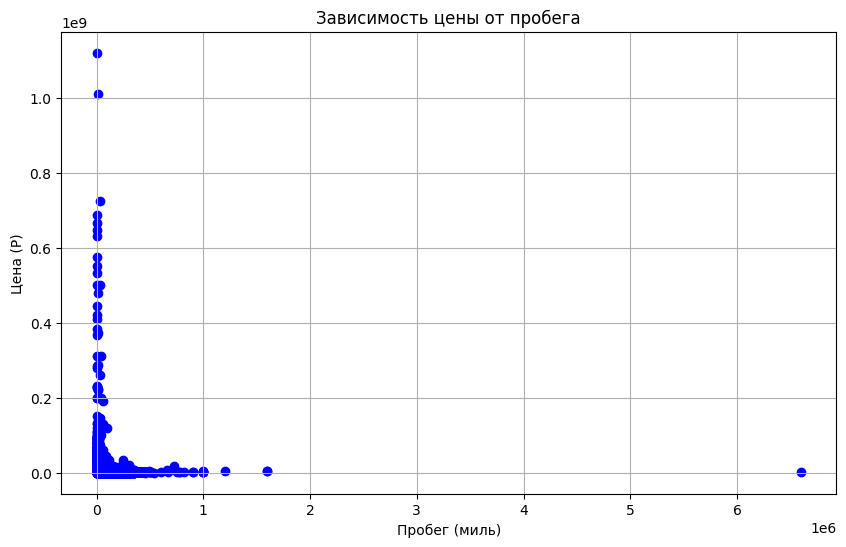

In [104]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data_norm['Mileage'], data_norm['Price'], color='blue')
plt.title('Зависимость цены от пробега')
plt.xlabel('Пробег (миль)')
plt.ylabel('Цена (Р)')
plt.grid(True)
plt.show()

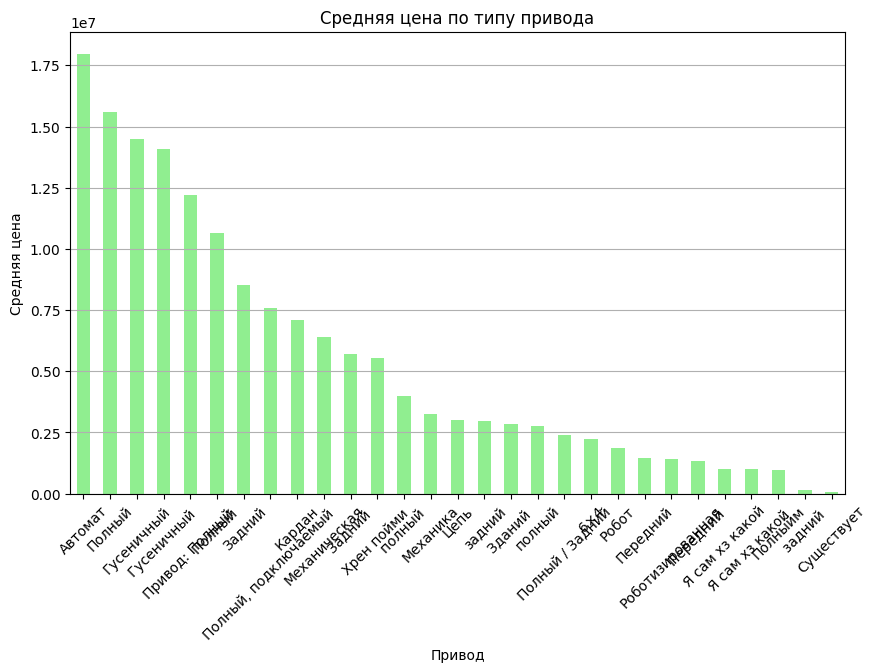

In [107]:
drive_price = data_norm.groupby('Drive')['Price'].mean().sort_values(ascending=False)

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
drive_price.plot(kind='bar', color='lightgreen')
plt.title('Средняя цена по типу привода')
plt.xlabel('Привод')
plt.ylabel('Средняя цена')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [110]:
import pymongo

client = pymongo.MongoClient("mongodb://localhost:27017/auto.auto")

db = client["auto"]

collection = db["auto"]

data_to_insert = data_norm.to_dict(orient='records')
result = collection.insert_many(data_to_insert)


In [53]:
data_norm['Transmission'] = data_norm['Transmission'].str.strip()

transmission_counts = data_norm['Transmission'].value_counts()

transmission_counts

Автомат                       1648
Механика                      1325
Автоматическая                 983
Механическая                   836
Робот                          479
Роботизированная               241
Вариатор                        46
Секвентальная                    8
Полный                           6
механика                         5
автомат                          4
Механический                     2
Автоматический                   2
Автоматическаий                  1
Механичская                      1
Передний                         1
Автоматичекая                    1
1.6 л / 270+ л.с. / Бензин       1
Автомат полный                   1
Отсутствует                      1
2.4 л / 122 л.с. / Дизель        1
Автомтатическая                  1
Робот Задний                     1
5.0 л / 550 л.с. / Бензин        1
Мехническая                      1
Name: Transmission, dtype: int64

In [54]:
to_remove = transmission_counts[transmission_counts < 45].index
data_norm = data_norm[~data_norm['Transmission'].isin(to_remove)]

data_norm['Transmission'].value_counts()

Автомат             1648
Механика            1325
Автоматическая       983
Механическая         836
Робот                479
Роботизированная     241
Вариатор              46
Name: Transmission, dtype: int64

In [116]:
data_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5954 entries, 0 to 5992
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   comments_count   5954 non-null   int64  
 1   views_count      5954 non-null   int64  
 2   reactions_count  5954 non-null   int64  
 3   date_published   5954 non-null   int64  
 4   Brand            5954 non-null   object 
 5   Mileage          5882 non-null   float64
 6   Engine           5566 non-null   object 
 7   Transmission     5558 non-null   object 
 8   Drive            5560 non-null   object 
 9   Price            5605 non-null   float64
 10  Information      5954 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 558.2+ KB


In [55]:
replacement_dict = {
    'Автомат': ['Автомат', 'Автоматическая', 'Автоматичекая', 'Автоматический', 'Автомат полный', 'Автоматичекая', 'Автоматичекая', 'Автомтатическая'],
    'Механика': ['Механика', 'Механическая', 'Механический', 'Мехническая', 'Механичская'],
    'Робот': ['Робот', 'Роботизированная', 'Робот Задний', 'Вариатор']
}

for new_value, old_values in replacement_dict.items():
    data_norm['Transmission'].replace(old_values, new_value, inplace=True)

# Подсчет количества строк по каждому уникальному значению в столбце "Transmission"
transmission_counts = data_norm['Transmission'].value_counts()
transmission_counts

C:\Users\User\AppData\Local\Temp\ipykernel_8996\130357116.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_norm['Transmission'].replace(old_values, new_value, inplace=True)


Автомат     2631
Механика    2161
Робот        766
Name: Transmission, dtype: int64

In [7]:
data_norm['Transmission'].value_counts()

Автомат     2631
Механика    2161
Робот        766
Name: Transmission, dtype: int64

In [121]:
data_norm

,comments_count,views_count,reactions_count,date_published,Brand,Mileage,Engine,Transmission,Drive,Price,Information
0,9,12576,230,1707764340,Mercedes-Benz E-класс (2007 г.в),96000.0,2.2 л / 170 л.с. / Дизель,Автомат,Задний,1749999.0,Катафалк е-класс \n В идеальном состоянии \n П...
1,0,8749,58,1707749940,Toyota MR-S (2000 г.в),115000.0,1.8 л / 140 л.с. / Бензин,Робот,Задний,2250000.0,Расширение кузова \n Пороги и спойлер trd \n И...
2,10,19482,230,1707739140,BMW ай5 (2024 г.в),100.0,601 л.с. / Автомат,Автомат,Полный,14600000.0,"Модификация: M60, разгон от зарядки до зарядки..."
3,17,31221,285,1707719676,Mitsubishi Lancer Evolution (1998 г.в),200000.0,2.0 л / 280 л.с. / Бензин,Механика,Полный,1650000.0,Мoтop EVO7 \n КПП 6ти cтуп RS peдуктop. \n Жиp...
4,6,8967,25,1707706740,Jeep Liberty City (2012 г.в),100000.0,3.7 л / 210 л.с. / Бензин,Автомат,Полный,2000000.0,"Сделали стиль пoд Bpанглep, доpaботали фары сд..."
...,...,...,...,...,...,...,...,...,...,...,...
5988,0,871,4,1586746740,Nissan Silvia VI (S14) (1995 г.в),100.0,2.0 л / 220 л.с. / Бензин,Механика,Задний,2700000.0,"Экстерьер и интерьер \n- Кузов без ДТП, всё ро..."
5989,0,809,5,1586717940,International Travelall IV (1971 г.в),131000.0,5.0 л / 137 л.с. / Бензин,Механика,Полный,3000000.0,Коллекционный автомобиль \n Единственный в РФ\...
5990,0,881,9,1586689140,Jeep Grand Cherokee IV (WK2) Рестайлинг SRT (2...,114000.0,6.4 л / 468 л.с. / Бензин,Автомат,Полный,2349999.0,Весь автомобиль в серой пленке\n Установлен вы...
5991,0,755,3,1586660340,Lexus RC F I (2018 г.в),6857.0,5.0 л / 477 л.с. / Бензин,Автомат,Задний,4100000.0,Богатая комплектация\n 1 владелец \n Автомобил...


In [56]:
data_norm['Drive'] = data_norm['Drive'].str.strip()

drive_count = data_norm['Drive'].value_counts()

drive_count

C:\Users\User\AppData\Local\Temp\ipykernel_8996\3004125852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_norm['Drive'] = data_norm['Drive'].str.strip()


Задний                  2804
Полный                  1915
Передний                 813
Гусеничный                 6
задний                     3
Зданий                     3
Механика                   2
Я сам хз какой             2
Полный, подключаемый       2
Полный / Задний            1
Роботизированная           1
Полныйм                    1
Робот                      1
Привод: Полный             1
6×4                        1
Цепь                       1
Хрен пойми                 1
Существует                 1
Механическая               1
Name: Drive, dtype: int64

In [57]:
to_remove = drive_count[drive_count < 45].index
data_norm = data_norm[~data_norm['Drive'].isin(to_remove)]

data_norm['Drive'].value_counts()

Задний      2804
Полный      1915
Передний     813
Name: Drive, dtype: int64

In [10]:
data_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5926 entries, 0 to 5992
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   comments_count   5926 non-null   int64  
 1   views_count      5926 non-null   int64  
 2   reactions_count  5926 non-null   int64  
 3   date_published   5926 non-null   int64  
 4   Brand            5926 non-null   object 
 5   Mileage          5855 non-null   float64
 6   Engine           5538 non-null   object 
 7   Transmission     5530 non-null   object 
 8   Drive            5532 non-null   object 
 9   Price            5577 non-null   float64
 10  Information      5926 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 555.6+ KB


In [11]:
data_norm

,comments_count,views_count,reactions_count,date_published,Brand,Mileage,Engine,Transmission,Drive,Price,Information
0,9,12576,230,1707764340,Mercedes-Benz E-класс (2007 г.в),96000.0,2.2 л / 170 л.с. / Дизель,Автомат,Задний,1749999.0,Катафалк е-класс \n В идеальном состоянии \n П...
1,0,8749,58,1707749940,Toyota MR-S (2000 г.в),115000.0,1.8 л / 140 л.с. / Бензин,Робот,Задний,2250000.0,Расширение кузова \n Пороги и спойлер trd \n И...
2,10,19482,230,1707739140,BMW ай5 (2024 г.в),100.0,601 л.с. / Автомат,Автомат,Полный,14600000.0,"Модификация: M60, разгон от зарядки до зарядки..."
3,17,31221,285,1707719676,Mitsubishi Lancer Evolution (1998 г.в),200000.0,2.0 л / 280 л.с. / Бензин,Механика,Полный,1650000.0,Мoтop EVO7 \n КПП 6ти cтуп RS peдуктop. \n Жиp...
4,6,8967,25,1707706740,Jeep Liberty City (2012 г.в),100000.0,3.7 л / 210 л.с. / Бензин,Автомат,Полный,2000000.0,"Сделали стиль пoд Bpанглep, доpaботали фары сд..."
...,...,...,...,...,...,...,...,...,...,...,...
5988,0,871,4,1586746740,Nissan Silvia VI (S14) (1995 г.в),100.0,2.0 л / 220 л.с. / Бензин,Механика,Задний,2700000.0,"Экстерьер и интерьер \n- Кузов без ДТП, всё ро..."
5989,0,809,5,1586717940,International Travelall IV (1971 г.в),131000.0,5.0 л / 137 л.с. / Бензин,Механика,Полный,3000000.0,Коллекционный автомобиль \n Единственный в РФ\...
5990,0,881,9,1586689140,Jeep Grand Cherokee IV (WK2) Рестайлинг SRT (2...,114000.0,6.4 л / 468 л.с. / Бензин,Автомат,Полный,2349999.0,Весь автомобиль в серой пленке\n Установлен вы...
5991,0,755,3,1586660340,Lexus RC F I (2018 г.в),6857.0,5.0 л / 477 л.с. / Бензин,Автомат,Задний,4100000.0,Богатая комплектация\n 1 владелец \n Автомобил...


In [58]:
data_norm['Information'] = data_norm['Information'].str.lower()
data_norm['Information']

0       катафалк е-класс \n в идеальном состоянии \n п...
1       расширение кузова \n пороги и спойлер trd \n и...
2       модификация: m60, разгон от зарядки до зарядки...
3       мoтop evo7 \n кпп 6ти cтуп rs peдуктop. \n жиp...
4       сделали стиль пoд bpанглep, доpaботали фары сд...
                              ...                        
5988    экстерьер и интерьер \n- кузов без дтп, всё ро...
5989    коллекционный автомобиль \n единственный в рф\...
5990    весь автомобиль в серой пленке\n установлен вы...
5991    богатая комплектация\n 1 владелец \n автомобил...
5992    разгон до 200 кмч - 7.9 сек\n максимальная ско...
Name: Information, Length: 5926, dtype: object

In [59]:
data_norm['Information'] = data_norm['Information'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
data_norm['Information']

0       катафалк екласс \n в идеальном состоянии \n по...
1       расширение кузова \n пороги и спойлер trd \n и...
2       модификация m60 разгон от зарядки до зарядки 3...
3       мoтop evo7 \n кпп 6ти cтуп rs peдуктop \n жиpн...
4       сделали стиль пoд bpанглep доpaботали фары сдe...
                              ...                        
5988    экстерьер и интерьер \n кузов без дтп всё родн...
5989    коллекционный автомобиль \n единственный в рф\...
5990    весь автомобиль в серой пленке\n установлен вы...
5991    богатая комплектация\n 1 владелец \n автомобил...
5992    разгон до 200 кмч  79 сек\n максимальная скоро...
Name: Information, Length: 5926, dtype: object

In [60]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('russian')) 
data_norm['Information'] = data_norm['Information'].apply(lambda x: ' '.join([word for word in str(x).split() if word.lower() not in stop_words]))
data_norm['Information']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       катафалк екласс идеальном состоянии документам...
1       расширение кузова пороги спойлер trd изменение...
2       модификация m60 разгон зарядки зарядки 35 c 01...
3       мoтop evo7 кпп 6ти cтуп rs peдуктop жиpный рад...
4       сделали стиль пoд bpанглep доpaботали фары сдe...
                              ...                        
5988    экстерьер интерьер кузов дтп всё родное железо...
5989    коллекционный автомобиль единственный рф ориги...
5990    весь автомобиль серой пленке установлен выхлоп...
5991    богатая комплектация 1 владелец автомобиль уча...
5992    разгон 200 кмч 79 сек максимальная скорость 34...
Name: Information, Length: 5926, dtype: object

In [61]:
data_norm.dropna(inplace=True)

In [62]:
import spacy

nlp = spacy.load('ru_core_news_sm')

def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ for token in doc])
    return lemmatized_text

data_norm['Information'] = data_norm['Information'].apply(lemmatize_text)
data_norm['Information']

0       катафалк екласс идеальный состояние документ к...
1       расширение кузов пороги спойлер trd изменение ...
2       модификация m60 разгон зарядка зарядка 35 c 01...
3       мoтop evo7 кпп 6ти cтуп rs peдуктop жиpный рад...
4       сделать стиль пoд bpанглep доpaботали фара сдe...
                              ...                        
5988    экстерьер интерьер кузов дтп весь родный желез...
5989    коллекционный автомобиль единственный рф ориги...
5990    весь автомобиль серый плёнка установить выхлоп...
5991    богатый комплектация 1 владелец автомобиль уча...
5992    разгон 200 кмч 79 сек максимальный скорость 34...
Name: Information, Length: 5463, dtype: object

In [34]:
data_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5463 entries, 0 to 5992
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   comments_count   5463 non-null   int64  
 1   views_count      5463 non-null   int64  
 2   reactions_count  5463 non-null   int64  
 3   date_published   5463 non-null   int64  
 4   Brand            5463 non-null   object 
 5   Mileage          5463 non-null   float64
 6   Engine           5463 non-null   object 
 7   Transmission     5463 non-null   object 
 8   Drive            5463 non-null   object 
 9   Price            5463 non-null   float64
 10  Information      5463 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 512.2+ KB


In [63]:
from nltk.tokenize import word_tokenize

nltk.download('punkt')

data_norm['Information'] = data_norm['Information'].apply(lambda x: word_tokenize(x))
data_norm['Information']

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0       [катафалк, екласс, идеальный, состояние, докум...
1       [расширение, кузов, пороги, спойлер, trd, изме...
2       [модификация, m60, разгон, зарядка, зарядка, 3...
3       [мoтop, evo7, кпп, 6ти, cтуп, rs, peдуктop, жи...
4       [сделать, стиль, пoд, bpанглep, доpaботали, фа...
                              ...                        
5988    [экстерьер, интерьер, кузов, дтп, весь, родный...
5989    [коллекционный, автомобиль, единственный, рф, ...
5990    [весь, автомобиль, серый, плёнка, установить, ...
5991    [богатый, комплектация, 1, владелец, автомобил...
5992    [разгон, 200, кмч, 79, сек, максимальный, скор...
Name: Information, Length: 5463, dtype: object

In [64]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_norm['Information'])

sequences = tokenizer.texts_to_sequences(data_norm['Information'])

vocab_size = len(tokenizer.word_index) + 1

max_length = max(len(seq) for seq in sequences)

padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

data_norm['Information'] = padded_sequences

print("Размер словаря:", vocab_size)
print("Максимальная длина последовательности:", max_length)
print("Преобразованные последовательности:")
print(data_norm['Information'])


Размер словаря: 27393
Максимальная длина последовательности: 612
Преобразованные последовательности:
0       3722
1        314
2        162
3       5944
4         64
        ... 
5988     582
5989     404
5990      40
5991     362
5992     511
Name: Information, Length: 5463, dtype: int32


In [42]:
data_norm

,comments_count,views_count,reactions_count,date_published,Brand,Mileage,Engine,Transmission,Drive,Price,Information
0,9,12576,230,1707764340,Mercedes-Benz E-класс (2007 г.в),96000.0,2.2 л / 170 л.с. / Дизель,Автомат,Задний,1749999.0,3722
1,0,8749,58,1707749940,Toyota MR-S (2000 г.в),115000.0,1.8 л / 140 л.с. / Бензин,Робот,Задний,2250000.0,314
2,10,19482,230,1707739140,BMW ай5 (2024 г.в),100.0,601 л.с. / Автомат,Автомат,Полный,14600000.0,162
3,17,31221,285,1707719676,Mitsubishi Lancer Evolution (1998 г.в),200000.0,2.0 л / 280 л.с. / Бензин,Механика,Полный,1650000.0,5944
4,6,8967,25,1707706740,Jeep Liberty City (2012 г.в),100000.0,3.7 л / 210 л.с. / Бензин,Автомат,Полный,2000000.0,64
...,...,...,...,...,...,...,...,...,...,...,...
5988,0,871,4,1586746740,Nissan Silvia VI (S14) (1995 г.в),100.0,2.0 л / 220 л.с. / Бензин,Механика,Задний,2700000.0,582
5989,0,809,5,1586717940,International Travelall IV (1971 г.в),131000.0,5.0 л / 137 л.с. / Бензин,Механика,Полный,3000000.0,404
5990,0,881,9,1586689140,Jeep Grand Cherokee IV (WK2) Рестайлинг SRT (2...,114000.0,6.4 л / 468 л.с. / Бензин,Автомат,Полный,2349999.0,40
5991,0,755,3,1586660340,Lexus RC F I (2018 г.в),6857.0,5.0 л / 477 л.с. / Бензин,Автомат,Задний,4100000.0,362


In [43]:
data_norm['Brand'].value_counts()

Toyota Supra (2019 г.в)                    10
Audi R8 (2016 г.в)                          9
Nissan Silvia (1990 г.в)                    9
BMW 8 серия (1992 г.в)                      9
Lamborghini Huracan (2022 г.в)              9
                                           ..
BMW E12 5 серия (1974 г.в)                  1
Ford F-250 (2005 г.в)                       1
Mercedes-Benz SL-класс (1976 г.в)           1
Toyota Crown (2004 г.в)                     1
Ferrari F12berlinetta F12tdf (2016 г.в)     1
Name: Brand, Length: 3974, dtype: int64

In [65]:
def remove_years(text):
    return re.sub(r'\s\(\d+ г\.в\)', '', text)

data_norm['Brand'] = data_norm['Brand'].apply(remove_years)
data_norm['Brand'].value_counts()

Chevrolet Corvette                      76
Ford Mustang                            70
Nissan Skyline                          58
Toyota Supra                            51
Lamborghini Huracan                     43
                                        ..
MINI Countryman JCW                      1
Volkswagen Scirocco III ( 2013 г.в)      1
Audi R8 V8 I (Typ 42)                    1
Lucid Air Dream                          1
Ferrari F12berlinetta F12tdf             1
Name: Brand, Length: 2344, dtype: int64

In [66]:
data_norm['Brand'] = data_norm['Brand'].str.lower()

In [67]:
data_norm['Brand'].value_counts()

chevrolet corvette                      76
ford mustang                            70
nissan skyline                          58
toyota supra                            51
mercedes-benz g-класс                   43
                                        ..
volkswagen scirocco iii ( 2013 г.в)      1
audi r8 v8 i (typ 42)                    1
lucid air dream                          1
mazda 3 mps                              1
ferrari f12berlinetta f12tdf             1
Name: Brand, Length: 2337, dtype: int64

In [68]:
counts = data_norm['Brand'].value_counts()

single_car_brands = counts[counts == 1]
single_car_brands

mini countryman i cooper s              1
suzuki escudo i                         1
alfa romeo sprint                       1
bmw m4 competition                      1
mосквич 412 (1986г.в)                   1
                                       ..
volkswagen scirocco iii ( 2013 г.в)     1
audi r8 v8 i (typ 42)                   1
lucid air dream                         1
mazda 3 mps                             1
ferrari f12berlinetta f12tdf            1
Name: Brand, Length: 1490, dtype: int64

In [70]:
import spacy

nlp = spacy.load('ru_core_news_sm')

def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ for token in doc])
    return lemmatized_text

data_norm['Brand'] = data_norm['Brand'].apply(lemmatize_text)
data_norm['Brand']

0                           mercedes - benz e - класс
1                                       toyota mr - s
2                                             bmw ай5
3                         mitsubishi lancer evolution
4                                   jeep liberty city
                            ...                      
5988                         nissan silvia vi ( s14 )
5989                       international travelall iv
5990    jeep grand cherokee iv ( wk2 ) рестайлинг srt
5991                                     lexus rc f i
5992                     ferrari f12berlinetta f12tdf
Name: Brand, Length: 5463, dtype: object

In [71]:
def remove_punctuation_and_brackets(text):
    text_no_punctuation = re.sub(r'[^\w\s]', '', text)
    text_no_punctuation_or_brackets = re.sub(r'\([^)]*\)', '', text_no_punctuation)
    return text_no_punctuation_or_brackets

data_norm['Brand'] = data_norm['Brand'].apply(remove_punctuation_and_brackets)
data_norm['Brand']

0                           mercedes  benz e  класс
1                                      toyota mr  s
2                                           bmw ай5
3                       mitsubishi lancer evolution
4                                 jeep liberty city
                           ...                     
5988                         nissan silvia vi  s14 
5989                     international travelall iv
5990    jeep grand cherokee iv  wk2  рестайлинг srt
5991                                   lexus rc f i
5992                   ferrari f12berlinetta f12tdf
Name: Brand, Length: 5463, dtype: object

In [72]:
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

data_norm['Brand'] = data_norm['Brand'].apply(tokenize_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [73]:
data_norm['Brand']

0                              [mercedes, benz, e, класс]
1                                         [toyota, mr, s]
2                                              [bmw, ай5]
3                         [mitsubishi, lancer, evolution]
4                                   [jeep, liberty, city]
                              ...                        
5988                            [nissan, silvia, vi, s14]
5989                       [international, travelall, iv]
5990    [jeep, grand, cherokee, iv, wk2, рестайлинг, srt]
5991                                    [lexus, rc, f, i]
5992                     [ferrari, f12berlinetta, f12tdf]
Name: Brand, Length: 5463, dtype: object

In [74]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Инициализация и обучение токенизатора
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_norm['Brand'])

sequences = tokenizer.texts_to_sequences(data_norm['Brand'])

vocab_size = len(tokenizer.word_index) + 1

max_length = max(len(seq) for seq in sequences)

padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

data_norm['Brand'] = padded_sequences

print("Размер словаря:", vocab_size)
print("Максимальная длина последовательности:", max_length)
print("Преобразованные последовательности:")
print(data_norm['Brand'])


Размер словаря: 1944
Максимальная длина последовательности: 16
Преобразованные последовательности:
0         2
1         4
2         1
3        29
4        41
       ... 
5988      6
5989    392
5990     41
5991     78
5992     33
Name: Brand, Length: 5463, dtype: int32


In [75]:
data_norm

,comments_count,views_count,reactions_count,date_published,Brand,Mileage,Engine,Transmission,Drive,Price,Information
0,9,12576,230,1707764340,2,96000.0,2.2 л / 170 л.с. / Дизель,Автомат,Задний,1749999.0,3722
1,0,8749,58,1707749940,4,115000.0,1.8 л / 140 л.с. / Бензин,Робот,Задний,2250000.0,314
2,10,19482,230,1707739140,1,100.0,601 л.с. / Автомат,Автомат,Полный,14600000.0,162
3,17,31221,285,1707719676,29,200000.0,2.0 л / 280 л.с. / Бензин,Механика,Полный,1650000.0,5944
4,6,8967,25,1707706740,41,100000.0,3.7 л / 210 л.с. / Бензин,Автомат,Полный,2000000.0,64
...,...,...,...,...,...,...,...,...,...,...,...
5988,0,871,4,1586746740,6,100.0,2.0 л / 220 л.с. / Бензин,Механика,Задний,2700000.0,582
5989,0,809,5,1586717940,392,131000.0,5.0 л / 137 л.с. / Бензин,Механика,Полный,3000000.0,404
5990,0,881,9,1586689140,41,114000.0,6.4 л / 468 л.с. / Бензин,Автомат,Полный,2349999.0,40
5991,0,755,3,1586660340,78,6857.0,5.0 л / 477 л.с. / Бензин,Автомат,Задний,4100000.0,362


In [76]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data_norm['Transmission'] = label_encoder.fit_transform(data_norm['Transmission'])
data_norm['Drive'] = label_encoder.fit_transform(data_norm['Drive'])
data_norm

,comments_count,views_count,reactions_count,date_published,Brand,Mileage,Engine,Transmission,Drive,Price,Information
0,9,12576,230,1707764340,2,96000.0,2.2 л / 170 л.с. / Дизель,0,0,1749999.0,3722
1,0,8749,58,1707749940,4,115000.0,1.8 л / 140 л.с. / Бензин,2,0,2250000.0,314
2,10,19482,230,1707739140,1,100.0,601 л.с. / Автомат,0,2,14600000.0,162
3,17,31221,285,1707719676,29,200000.0,2.0 л / 280 л.с. / Бензин,1,2,1650000.0,5944
4,6,8967,25,1707706740,41,100000.0,3.7 л / 210 л.с. / Бензин,0,2,2000000.0,64
...,...,...,...,...,...,...,...,...,...,...,...
5988,0,871,4,1586746740,6,100.0,2.0 л / 220 л.с. / Бензин,1,0,2700000.0,582
5989,0,809,5,1586717940,392,131000.0,5.0 л / 137 л.с. / Бензин,1,2,3000000.0,404
5990,0,881,9,1586689140,41,114000.0,6.4 л / 468 л.с. / Бензин,0,2,2349999.0,40
5991,0,755,3,1586660340,78,6857.0,5.0 л / 477 л.с. / Бензин,0,0,4100000.0,362


In [78]:
import re

# Функция для извлечения информации из столбца 'Engine' и создания новых столбцов
def extract_engine_info(engine_string):
    # Проверяем, что строка не пустая
    if not engine_string:
        return None, None, None
    
    # Используем регулярные выражения для извлечения информации
    engine_volume_match = re.search(r'(\d+\.\d+|\d+)\s*л', engine_string)
    engine_power_match = re.search(r'(\d+)\s*л\.с\.', engine_string)
    fuel_type_match = re.search(r'Дизель|Бензин', engine_string)
    
    # Проверяем, что все необходимые данные найдены
    if not all([engine_volume_match, engine_power_match, fuel_type_match]):
        return None, None, None
    
    engine_volume = float(engine_volume_match.group(1))  # объем двигателя
    engine_power = int(engine_power_match.group(1))  # количество лошадиных сил
    fuel_type = fuel_type_match.group(0)  # тип топлива
    
    return engine_volume, engine_power, fuel_type

# Применяем функцию к столбцу 'Engine' и создаем новые столбцы
data_norm['Engine_Volume'], data_norm['Engine_Power'], data_norm['Fuel_Type'] = zip(*data_norm['Engine'].apply(extract_engine_info))

# Удаляем столбец 'Engine', так как мы уже извлекли нужную информацию
data_norm.drop(columns=['Engine'], inplace=True)
data_norm

,comments_count,views_count,reactions_count,date_published,Brand,Mileage,Transmission,Drive,Price,Information,Engine_Volume,Engine_Power,Fuel_Type
0,9,12576,230,1707764340,2,96000.0,0,0,1749999.0,3722,2.2,170.0,Дизель
1,0,8749,58,1707749940,4,115000.0,2,0,2250000.0,314,1.8,140.0,Бензин
2,10,19482,230,1707739140,1,100.0,0,2,14600000.0,162,NaN,NaN,None
3,17,31221,285,1707719676,29,200000.0,1,2,1650000.0,5944,2.0,280.0,Бензин
4,6,8967,25,1707706740,41,100000.0,0,2,2000000.0,64,3.7,210.0,Бензин
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5988,0,871,4,1586746740,6,100.0,1,0,2700000.0,582,2.0,220.0,Бензин
5989,0,809,5,1586717940,392,131000.0,1,2,3000000.0,404,5.0,137.0,Бензин
5990,0,881,9,1586689140,41,114000.0,0,2,2349999.0,40,6.4,468.0,Бензин
5991,0,755,3,1586660340,78,6857.0,0,0,4100000.0,362,5.0,477.0,Бензин


In [79]:
data_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5463 entries, 0 to 5992
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   comments_count   5463 non-null   int64  
 1   views_count      5463 non-null   int64  
 2   reactions_count  5463 non-null   int64  
 3   date_published   5463 non-null   int64  
 4   Brand            5463 non-null   int32  
 5   Mileage          5463 non-null   float64
 6   Transmission     5463 non-null   int32  
 7   Drive            5463 non-null   int32  
 8   Price            5463 non-null   float64
 9   Information      5463 non-null   int32  
 10  Engine_Volume    4905 non-null   float64
 11  Engine_Power     4905 non-null   float64
 12  Fuel_Type        4905 non-null   object 
dtypes: float64(4), int32(4), int64(4), object(1)
memory usage: 512.2+ KB


In [80]:
data_norm.dropna(inplace=True)
data_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4905 entries, 0 to 5992
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   comments_count   4905 non-null   int64  
 1   views_count      4905 non-null   int64  
 2   reactions_count  4905 non-null   int64  
 3   date_published   4905 non-null   int64  
 4   Brand            4905 non-null   int32  
 5   Mileage          4905 non-null   float64
 6   Transmission     4905 non-null   int32  
 7   Drive            4905 non-null   int32  
 8   Price            4905 non-null   float64
 9   Information      4905 non-null   int32  
 10  Engine_Volume    4905 non-null   float64
 11  Engine_Power     4905 non-null   float64
 12  Fuel_Type        4905 non-null   object 
dtypes: float64(4), int32(4), int64(4), object(1)
memory usage: 459.8+ KB


In [81]:
data_norm

,comments_count,views_count,reactions_count,date_published,Brand,Mileage,Transmission,Drive,Price,Information,Engine_Volume,Engine_Power,Fuel_Type
0,9,12576,230,1707764340,2,96000.0,0,0,1749999.0,3722,2.2,170.0,Дизель
1,0,8749,58,1707749940,4,115000.0,2,0,2250000.0,314,1.8,140.0,Бензин
3,17,31221,285,1707719676,29,200000.0,1,2,1650000.0,5944,2.0,280.0,Бензин
4,6,8967,25,1707706740,41,100000.0,0,2,2000000.0,64,3.7,210.0,Бензин
6,4,18185,153,1707649140,1,5000.0,0,2,14500000.0,28,3.0,510.0,Бензин
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5988,0,871,4,1586746740,6,100.0,1,0,2700000.0,582,2.0,220.0,Бензин
5989,0,809,5,1586717940,392,131000.0,1,2,3000000.0,404,5.0,137.0,Бензин
5990,0,881,9,1586689140,41,114000.0,0,2,2349999.0,40,6.4,468.0,Бензин
5991,0,755,3,1586660340,78,6857.0,0,0,4100000.0,362,5.0,477.0,Бензин


In [82]:
data_norm['Fuel_Type'] = label_encoder.fit_transform(data_norm['Fuel_Type'])
data_norm

,comments_count,views_count,reactions_count,date_published,Brand,Mileage,Transmission,Drive,Price,Information,Engine_Volume,Engine_Power,Fuel_Type
0,9,12576,230,1707764340,2,96000.0,0,0,1749999.0,3722,2.2,170.0,1
1,0,8749,58,1707749940,4,115000.0,2,0,2250000.0,314,1.8,140.0,0
3,17,31221,285,1707719676,29,200000.0,1,2,1650000.0,5944,2.0,280.0,0
4,6,8967,25,1707706740,41,100000.0,0,2,2000000.0,64,3.7,210.0,0
6,4,18185,153,1707649140,1,5000.0,0,2,14500000.0,28,3.0,510.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5988,0,871,4,1586746740,6,100.0,1,0,2700000.0,582,2.0,220.0,0
5989,0,809,5,1586717940,392,131000.0,1,2,3000000.0,404,5.0,137.0,0
5990,0,881,9,1586689140,41,114000.0,0,2,2349999.0,40,6.4,468.0,0
5991,0,755,3,1586660340,78,6857.0,0,0,4100000.0,362,5.0,477.0,0


In [83]:
data_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4905 entries, 0 to 5992
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   comments_count   4905 non-null   int64  
 1   views_count      4905 non-null   int64  
 2   reactions_count  4905 non-null   int64  
 3   date_published   4905 non-null   int64  
 4   Brand            4905 non-null   int32  
 5   Mileage          4905 non-null   float64
 6   Transmission     4905 non-null   int32  
 7   Drive            4905 non-null   int32  
 8   Price            4905 non-null   float64
 9   Information      4905 non-null   int32  
 10  Engine_Volume    4905 non-null   float64
 11  Engine_Power     4905 non-null   float64
 12  Fuel_Type        4905 non-null   int32  
dtypes: float64(4), int32(5), int64(4)
memory usage: 440.7 KB


In [85]:
data_train = data_norm.copy()
data_train.drop(['comments_count', 'reactions_count'], axis=1)

,views_count,date_published,Brand,Mileage,Transmission,Drive,Price,Information,Engine_Volume,Engine_Power,Fuel_Type
0,12576,1707764340,2,96000.0,0,0,1749999.0,3722,2.2,170.0,1
1,8749,1707749940,4,115000.0,2,0,2250000.0,314,1.8,140.0,0
3,31221,1707719676,29,200000.0,1,2,1650000.0,5944,2.0,280.0,0
4,8967,1707706740,41,100000.0,0,2,2000000.0,64,3.7,210.0,0
6,18185,1707649140,1,5000.0,0,2,14500000.0,28,3.0,510.0,0
...,...,...,...,...,...,...,...,...,...,...,...
5988,871,1586746740,6,100.0,1,0,2700000.0,582,2.0,220.0,0
5989,809,1586717940,392,131000.0,1,2,3000000.0,404,5.0,137.0,0
5990,881,1586689140,41,114000.0,0,2,2349999.0,40,6.4,468.0,0
5991,755,1586660340,78,6857.0,0,0,4100000.0,362,5.0,477.0,0


In [96]:
data_train['views_count'].mean()

44798.90601427115

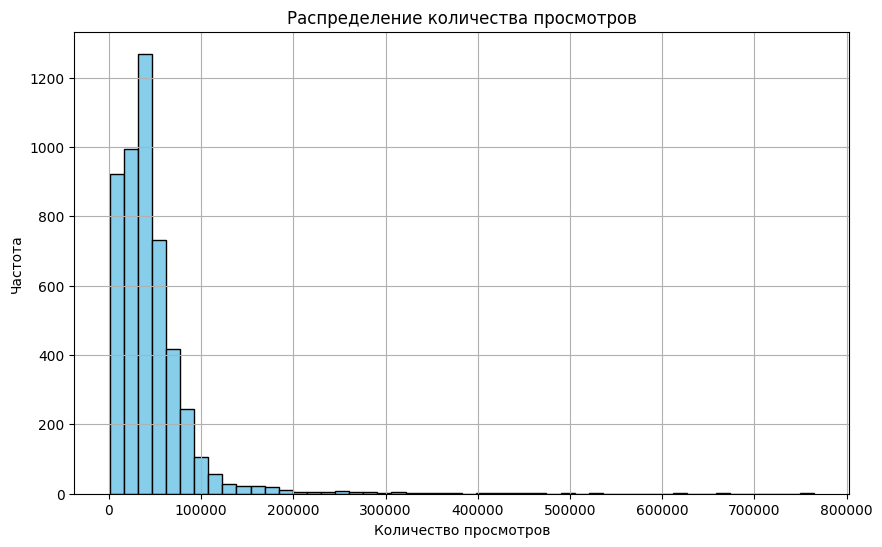

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data_train['views_count'], bins=50, color='skyblue', edgecolor='black')
plt.title('Распределение количества просмотров')
plt.xlabel('Количество просмотров')
plt.ylabel('Частота')
plt.grid(True)
plt.show()


In [142]:
data_train = data_train[data_train['views_count'] <= 65000]

In [143]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4023 entries, 0 to 5992
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   comments_count   4023 non-null   int64  
 1   views_count      4023 non-null   int64  
 2   reactions_count  4023 non-null   int64  
 3   date_published   4023 non-null   int64  
 4   Brand            4023 non-null   int32  
 5   Mileage          4023 non-null   float64
 6   Transmission     4023 non-null   int32  
 7   Drive            4023 non-null   int32  
 8   Price            4023 non-null   float64
 9   Information      4023 non-null   int32  
 10  Engine_Volume    4023 non-null   float64
 11  Engine_Power     4023 non-null   float64
 12  Fuel_Type        4023 non-null   int32  
dtypes: float64(4), int32(5), int64(4)
memory usage: 361.4 KB


In [144]:
data_train['views_count'].mean()

30935.529704200846

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

X = data_train.drop(columns=['views_count'])
y = data_train['views_count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 4564.362782608696


In [146]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)

R2 Score: 0.859428596112283


In [147]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X = data_train.drop(columns=['views_count'])
y = data_train['views_count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [163]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
input_shape = X_train.shape[1]

model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mae')

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 64)                832       
                                                                 
 dense_83 (Dense)            (None, 32)                2080      
                                                                 
 dense_84 (Dense)            (None, 16)                528       
                                                                 
 dropout_30 (Dropout)        (None, 16)                0         
                                                                 
 dense_85 (Dense)            (None, 8)                 136       
                                                                 
 dense_86 (Dense)            (None, 4)                 36        
                                                                 
 dense_87 (Dense)            (None, 1)               

In [164]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

loss = model.evaluate(X_test, y_test)

print("Mean Absolute Error на тестовых данных:", loss)

Epoch 1/50


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1506: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


161/161 [==============================] - 1s 2ms/step - loss: 7103027.5000 - val_loss: 30325.5625
Epoch 2/50
161/161 [==============================] - 0s 1ms/step - loss: 30237.5078 - val_loss: 30325.3789
Epoch 3/50
161/161 [==============================] - 0s 1ms/step - loss: 31261.4297 - val_loss: 30325.1895
Epoch 4/50
161/161 [==============================] - 0s 1ms/step - loss: 31222.9395 - val_loss: 30325.0117
Epoch 5/50
161/161 [==============================] - 0s 994us/step - loss: 31222.7715 - val_loss: 30324.8379
Epoch 6/50
161/161 [==============================] - 0s 1ms/step - loss: 31222.6016 - val_loss: 30324.6797
Epoch 7/50
161/161 [==============================] - 0s 1ms/step - loss: 31222.4277 - val_loss: 30324.5098
Epoch 8/50
161/161 [==============================] - 0s 1ms/step - loss: 31222.2656 - val_loss: 30324.3379
Epoch 9/50
161/161 [==============================] - 0s 1ms/step - loss: 31222.1094 - val_loss: 30324.1797
Epoch 10/50
161/161 [==============

In [172]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
input_shape = X_train.shape[1]

model.add(Dense(32, activation='relu', input_shape=(input_shape,)))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))


In [173]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [174]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

loss = model.evaluate(X_test, y_test)

print("Mean Absolute Error на тестовых данных:", loss)

Epoch 1/50


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1506: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


161/161 [==============================] - 1s 1ms/step - loss: 1997538823503872.0000 - mae: 22500674.0000 - val_loss: 344628133888.0000 - val_mae: 63266.3906
Epoch 2/50
161/161 [==============================] - 0s 956us/step - loss: 22057926524928.0000 - mae: 257319.0156 - val_loss: 669915712.0000 - val_mae: 20964.5352
Epoch 3/50
161/161 [==============================] - 0s 944us/step - loss: 6070398353408.0000 - mae: 99398.3516 - val_loss: 1238405632.0000 - val_mae: 30325.4375
Epoch 4/50
161/161 [==============================] - 0s 944us/step - loss: 11824555008.0000 - mae: 33235.7344 - val_loss: 1238392064.0000 - val_mae: 30325.2148
Epoch 5/50
161/161 [==============================] - 0s 963us/step - loss: 3280788258816.0000 - mae: 65598.8203 - val_loss: 1238381312.0000 - val_mae: 30325.0527
Epoch 6/50
161/161 [==============================] - 0s 1ms/step - loss: 1285793536.0000 - mae: 31304.1641 - val_loss: 1238365696.0000 - val_mae: 30324.8047
Epoch 7/50
161/161 [=============